In [42]:
#setup
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community
 
# read edge list
g = nx.read_edgelist("discretenode.txt")
ug = nx.to_undirected(g)
# print basic info (is the graph ok?)
print(nx.info(ug))

Name: 
Type: GraphView
Number of nodes: 183
Number of edges: 224
Average degree:   2.4481


In [28]:
# basic analysis

# number of nodes
print("number of noeds:",nx.number_of_nodes(ug))

#number of edges
print("number of edges:",nx.number_of_edges(ug))

#average clustering
nx.average_clustering(ug)

# diameter
print("Diameter:",nx.diameter(ug))
# this diameter shows ...

# average degree
sum = 0
for n in ug.nodes():
    sum = sum + ug.degree(n)
print("Average degree:", sum/ug.number_of_nodes())

number of noeds: 3
number of edges: 2
Diameter: 2
Average degree: 1.3333333333333333


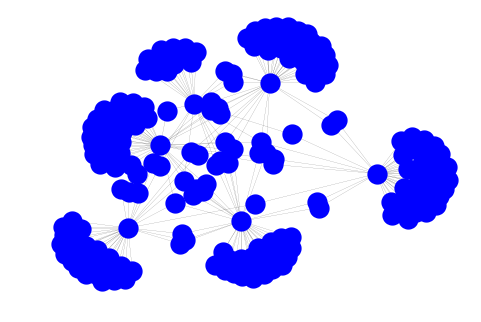

In [43]:
options = {
    'node_color': 'Blue',
    'node_size': 150,
    'line_color': 'Red',
    'linewidths': 8,
    'width': 0.1,
}
nx.draw(ug, **options)
plt.savefig ("simple_graph.png")

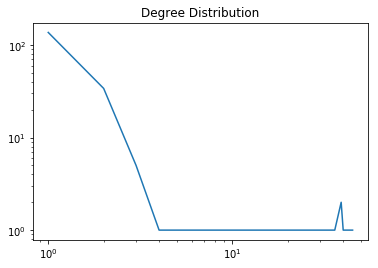

In [46]:
# taken from SNAP Tutorial
def plot_degree_distribution (wiki) :
    degs = {}
    for n in wiki.nodes () :
        deg = wiki.degree ( n )
        
        
        if deg not in degs :
            degs [ deg ] = 0
        
        degs [ deg ] += 1
    items = sorted ( degs.items () )
            
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    ax.plot ([ k for (k , v ) in items ] , [ v for (k ,v ) in items ])
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title("Degree Distribution")
    fig.savefig ("degree_distribution.png")
    
            
plot_degree_distribution(ug)

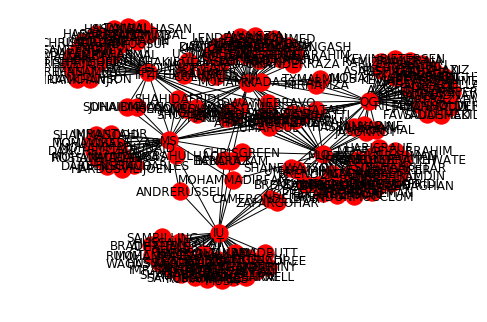

In [44]:
# draw a network with labels
options = {
    'node_color': 'Green',
    'node_size': 80,
    'line_color': 'Yellow',
    'linewidths': 7,
    'width': 0.1,
}
nx.draw(ug, with_labels=True)

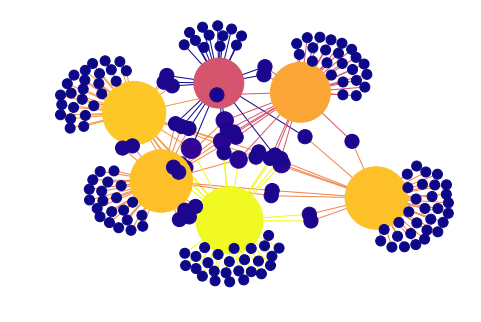

In [48]:
# set color and size of nodes as per degree of each node


d = [] # create a set
for n in ug.nodes():
    d.append(ug.degree(n))
    
ec = [] # create a set
for e in ug.edges():
    if(ug.degree(e[0]) > ug.degree(e[1])):
        ec.append(ug.degree(e[0]))
    else:
        ec.append(ug.degree(e[1]))
    
pos = nx.spring_layout(ug, iterations=100)

factor = 100 # to change the size of nodes with respect to their degree


# choose color plate from https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# example: viridis
nx.draw(ug, pos,
        edge_color = ec,  edge_cmap=plt.cm.plasma,  # edge color
        node_color = d, cmap=plt.cm.plasma, # node color
        node_size=[x * factor for x in d]) # node sizse
